#### Group-Wise Distance Metrics Learner: Experiment 02
* data resouce: simulation data genearted by Dr.Huang
* no. of users:
* no. of features:
* social structure

In [22]:
import os

import scipy as sp
import numpy as np
import pandas as pd
import sklearn as sk
import networkx as nx

from matplotlib import pyplot as plt

%matplotlib inline

In [31]:
!dir data

 Volume in drive C is SYSTEM
 Volume Serial Number is 1408-98AC

 Directory of C:\Z_personal_doc\phd_experiment\data

06/28/2015  04:40 PM    <DIR>          .
06/28/2015  04:40 PM    <DIR>          ..
06/27/2015  08:19 PM            44,043 drhuang_artificial_data_1.xlsx
06/28/2015  04:40 PM            20,686 drhuang_friend.csv
06/28/2015  04:40 PM             2,023 drhuang_person.csv
06/27/2015  08:19 PM    <DIR>          sim_data_yi
               3 File(s)         66,752 bytes
               3 Dir(s)  132,294,598,656 bytes free


In [104]:
user_df = pd.read_csv("data/drhuang_person.csv", header=0)
friend_df = pd.read_csv("data/drhuang_friend.csv", header=0,)

In [117]:
print user_df.describe()

uid_df = user_df["ID"]
profile_df = user_df[[c for c in user_df.columns if c != "ID"]]

               ID     Gender          Age      Region   Education      Income  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    50.500000    0.490000   56.540000    2.320000    2.070000    2.920000   
std     29.011492    0.502418   22.060715    1.581969    1.112418    1.750498   
min      1.000000    0.000000   19.000000    0.000000    0.000000    0.000000   
25%     25.750000    0.000000   37.000000    1.000000    1.000000    2.000000   
50%     50.500000    0.000000   58.000000    2.000000    2.000000    3.000000   
75%     75.250000    1.000000   75.000000    4.000000    3.000000    4.000000   
max    100.000000    1.000000   97.000000    5.000000    4.000000    6.000000   

            Hobby    Duration  
count  100.000000  100.000000  
mean     3.970000   24.510000  
std      2.066838   15.194028  
min      0.000000    0.000000  
25%      2.000000   10.000000  
50%      4.000000   25.000000  
75%      6.000000   38.000000  
max      7.000

In [160]:
friend_df.head(3)
#friend_df.columns = [""range(0, friend_df.shape[1]-1)
relation_mtx = friend_df.ix[:, 1:]
relation_mtx.head(4)

friend_pairs = []
uid_row = friend_df.ix[:, 0]
uid_col = uid_row

# convert relationship matrix into a list of user pairs
# to represent friendships, iterating through items
# on the lower triangle of the matrix
for i, uid_a in enumerate(uid_row):
    for j, uid_b in enumerate(uid_col):

        if uid_a < uid_b:
            ind = relation_mtx.ix[i, j]
            if ind == 1:
                friend_pairs.append((uid_a, uid_b))


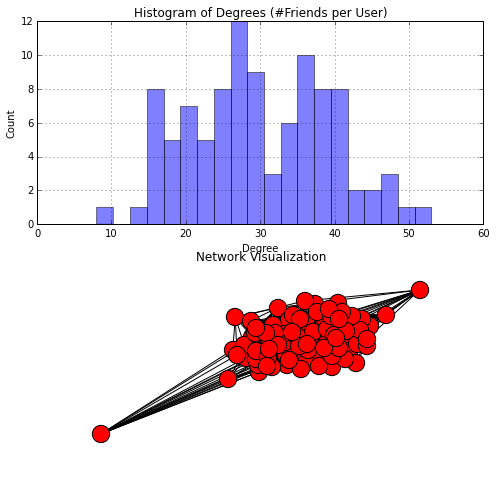

In [95]:
# load relationship into networkx.Graph()
from networkx import Graph

fnx = Graph()
fnx.add_edges_from(friend_pairs)

# examine the relationship
# summarize the structure
plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
pd.Series(fnx.degree().values()).hist(alpha=0.5, bins=20)
plt.title("Histogram of Degrees (#Friends per User)")
plt.xlabel("Degree")
plt.ylabel("Count")


# visualize social network
plt.subplot(2, 1, 2)
nx.draw(fnx, pos=nx.spring_layout(fnx))
plt.title("Network Visualization")

plt.show()

### Data Manipulation
* *user_df*: feature-wise normalization
* *friend_df*:
    * strategy 01: feature-wise normalization

In [96]:
def scalar(x):
    _min, _max = min(x), max(x)
    _range = (_max - _min) * 1.0
    res = [(i - _min) / _range for i in x]
    return res

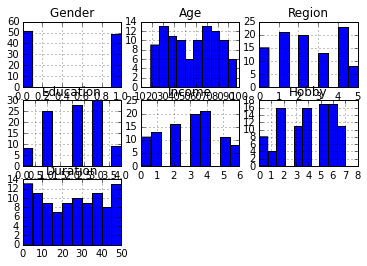

In [120]:
plt.figure()

for i, c in enumerate(profile_df.columns, 1):

    plt.subplot(3, 3, i)
    profile_df[c].hist()
    plt.title("%s" % c)

plt.show()

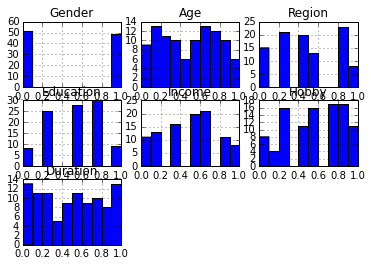

In [128]:
new_profile_df = pd.DataFrame()

new_profile_df["Gender"]    = profile_df.ix[:, 0]
new_profile_df["Age"]       = scalar(profile_df["Age"])
new_profile_df["Region"]    = scalar(profile_df["Region"])
new_profile_df["Education"] = scalar(profile_df["Education"])
new_profile_df["Income"]    = scalar(profile_df["Income"])
new_profile_df["Hobby"]     = scalar(profile_df["Hobby"])
new_profile_df["Duration"]  = scalar(profile_df["Duration"])

plt.figure()

for i, c in enumerate(new_profile_df.columns, 1):

    plt.subplot(3, 3, i)
    new_profile_df[c].hist()
    plt.title("%s" % c)

plt.show()

#### Apply the learning algorithm to data

In [257]:
from scipy.stats import rayleigh
from scipy.stats import ks_2samp
from numpy import linspace
from numpy.random import choice
from networkx import Graph

from learning_dist_metrics.ldm import LDM
from learning_dist_metrics.dist_metrics import weighted_euclidean

from GWDLearner import *

In [258]:
def group_composite(user_id, users_df):
    """ Summarize the emember's belongings
    """
    
    if len(user_id) > 0:
        is_row = [i_id in user_id for i_id in users_df.ID]
        num_g0 = sum(users_df.ix[is_row, "decision_style"] == 0)
        num_g1 = sum(users_df.ix[is_row, "decision_style"] == 1)
        ptg_g0 = round(num_g0 / float(len(user_id)), 2)
        ptg_g1 = round(num_g1 / float(len(user_id)), 2)
    else: 
        ptg_g0, ptg_g1 = 0, 0
        
    return (ptg_g0, ptg_g1)

In [260]:
users_df = user_df
all_user_ids = list(set(users_df.ID))
new_profile_df["ID"] = user_df.ID

ldm = LDM()
ldm.fit(new_profile_df, friend_pairs)

IndexError: list index out of range

In [265]:
#print new_profile_df.head(5)
#print S

In [268]:
from itertools import combinations
from scipy.optimize import minimize

from learning_dist_metrics.dist_metrics import weighted_euclidean
from learning_dist_metrics.dist_metrics import sum_grouped_dist
from learning_dist_metrics.dist_metrics import squared_sum_grouped_dist
from learning_dist_metrics.dist_metrics import *
from learning_dist_metrics.ldm import *

# new_profile_df, friend_pairs
X = new_profile_df
S = friend_pairs
D = None

try: 
    ids = X["ID"]
    X = X[[c for c in X.columns if c != "ID"]]
except:
    ids = [int(i) for i in X.ix[:, 0]]
    X = X[:, 1:]

#X = X[:, 1:]
n_sample, n_features = X.shape

bnds = [(0, None)] * n_features  # boundaries
init = [1] * n_features  # initial weights

if D is None:
    all_pairs = [p for p in combinations(ids, 2)]
    D = get_exclusive_pairs(all_pairs, S)
else:
    covered_items = get_unique_items(S, D)
    X = numpy.delete(X, covered_items, 0)
    
S_idx = [(find_index(a, ids), find_index(b, ids)) for (a, b) in S]
D_idx = [(find_index(a, ids), find_index(b, ids)) for (a, b) in D]

print S_idx
print D_idx

[(0, 5), (0, 17), (0, 20), (0, 25), (0, 26), (0, 28), (0, 33), (0, 42), (0, 45), (0, 51), (0, 54), (0, 55), (0, 66), (0, 68), (0, 74), (0, 75), (0, 77), (0, 81), (0, 82), (0, 84), (0, 87), (0, 89), (0, 94), (0, 98), (1, 6), (1, 11), (1, 17), (1, 21), (1, 22), (1, 24), (1, 29), (1, 30), (1, 32), (1, 38), (1, 45), (1, 46), (1, 47), (1, 48), (1, 51), (1, 53), (1, 62), (1, 64), (1, 65), (1, 67), (1, 69), (1, 70), (1, 71), (1, 72), (1, 73), (1, 75), (1, 76), (1, 78), (1, 88), (2, 7), (2, 8), (2, 9), (2, 12), (2, 15), (2, 20), (2, 29), (2, 34), (2, 45), (2, 46), (2, 54), (2, 60), (2, 63), (2, 66), (2, 68), (2, 74), (2, 77), (2, 79), (2, 80), (2, 82), (2, 83), (2, 84), (2, 96), (2, 98), (2, 99), (3, 10), (3, 13), (3, 27), (3, 28), (3, 39), (3, 44), (3, 54), (3, 60), (3, 61), (3, 79), (3, 81), (3, 85), (3, 86), (3, 90), (3, 93), (4, 13), (4, 16), (4, 18), (4, 19), (4, 23), (4, 28), (4, 31), (4, 37), (4, 39), (4, 42), (4, 50), (4, 52), (4, 55), (4, 59), (4, 68), (4, 70), (4, 74), (4, 76), (4, 7

In [269]:
def objective_func(w):
    a = squared_sum_grouped_dist(S_idx, X, w) * 1.0
    b = sum_grouped_dist(D_idx, X, w) * 1.0
    return a - b

start_time = time.time()
fitted = minimize(objective_func, init, method="L-BFGS-B", bounds=bnds)
duration = time.time() - start_time
#if self._report_excution_time:

print("--- %.2f seconds ---" % duration)
print  vec_normalized(fitted['x'])
print  fitted['fun'] / objective_func(init)

--- 35.70 seconds ---
[nan, nan, nan, nan, nan, nan, nan]
0.0


In [267]:
timer.append(time.time())
# ------ step 01 ------------ #
# training the initial distance weights by learning through the
# complete user base.
print "* ------ initial learning -------- *"
all_user_ids = list(set(users_df.ID))
init_weights = ldm_train_with_list(all_user_ids, profile_df, friends_df, 
                                   retain_type)
print "initial weights: %s" % init_weights
timer.append(time.time())

NameError: name 'timer' is not defined

In [131]:
import time

# ------ input parameter processing ------ #
# a. Graph() object store pair-wise relationships
# b. 

# friends_nx = Graph()
# friends_nx.add_nodes_from(list(set(users_df.ID)))

# for a, b in friends_df.pair:
#    friends_nx.add_edge(a, b)

# ------ argument definition ---- #
PVAL = 0.3
# retain type
retain_type = True
# the percentage of entity whose p-value is
# too large would be returned in res[1] 
mutate_rate = 1 
# True, use rayleigh distribution in KS-test
is_distr_fit = True
# the number of sample withdrawn from the fitted
# rayleigh distribution for KS-test
samp_num = 2000
# stop condition
max_iter= 100

# --- algorithm monitor ------
timer = []
loop_indexes = []
weights_a_collector = []
weights_b_collector = []
cnr_a_size = []
cnr_b_size = []
cnr_c_size = []

cnr_a_members = []
cnr_b_members = []
cnr_c_members = []

cnr_a_learns_collector = []
cnr_b_learns_collector = []
cnr_a_c_learns_collector = []
cnr_b_c_learns_collector = []


# ------ initiation ----- #
np.random.seed(1234)

cnr_a = []
cnr_b = []
cnr_c = []


timer.append(time.time())
# ------ step 01 ------------ #
# training the initial distance weights by learning through the
# complete user base.
print "* ------ initial learning -------- *"
all_user_ids = list(set(users_df.ID))
init_weights = ldm_train_with_list(all_user_ids, profile_df, friends_df, 
                                   retain_type)
print "initial weights: %s" % init_weights
timer.append(time.time())

# ----- step 02 ------------ #
# evalute each user with learned distance weights from
# previous step. Based on pvalue of ks-test, users with
# non-significant evidance for null hypothesis will be
# put in container b (not expalined by the distance wei
# -ghts. The null hypothesis stated that the disttribut
# -ion of between-friends distance is no different than 
# the couterpart of between-non-friends distance. Provi
# -ded with sizable p-value, a user's decision could no
# -t be expalined by the given distance weights
cnr_a, cnr_b = users_filter_by_weights(weights=init_weights, 
                                       profile_df=profile_df, 
                                       friends_networkx=friends_nx, 
                                       pval_threshold=0.5, 
                                       mutate_rate=mutate_rate, 
                                       min_friend_cnt=10, 
                                       users_list=all_user_ids,
                                       fit_rayleigh=is_distr_fit, _n=samp_num)

print "Group a's #member: %d" % len(cnr_a)
print "Group b's #member: %d" % len(cnr_b)
timer.append(time.time())

# ---- step 03 ----------- #
# learn a distinct set of distance weights for each
# of two user groups. Subsequently, using the newly
# learned distance weights to examine the members of 
# corresponding user group to determine if each mem
# -ber should be retined in the group, or not. The
# user rejected from its original group is subject
# to examination of the couterparting distance weights
# to see if it is good to be kept in the couterparting
# user group (or container). The users being rejected
# by both of distance weights will be stored in the 
# container c.
counter = 0
is_continue = True 
while is_continue:
    
    loop_disp_idx = counter + 1
    print "******** %d round ***********" % loop_disp_idx
    print "weights a is in learning..."
    weights_a = ldm_train_with_list(cnr_a, profile_df, friends_df, retain_type)
    
    print "weights b is in learning..."
    weights_b = ldm_train_with_list(cnr_b, profile_df, friends_df, retain_type)
    
    print "Group a's distance weights: %s" % weights_a
    print "Group b's distance weights: %s" % weights_b
    
    # examine the users in group a if it is suitable for weights_a
    # the reject group will be examined by weights_b
    # to see if some of them can be assigned to group b
    cnr_a, rej_a, cnr_a_learns = users_filter_by_weights(weights=weights_a, 
                                           profile_df=profile_df, 
                                           friends_networkx=friends_nx, 
                                           pval_threshold=PVAL, mutate_rate=mutate_rate, min_friend_cnt=10, 
                                           users_list=cnr_a,
                                           fit_rayleigh=is_distr_fit, _n=samp_num, is_debug=True)
    
    # examine the user
    cnr_b, rej_b, cnr_b_learns = users_filter_by_weights(weights=weights_b, 
                                           profile_df=profile_df, 
                                           friends_networkx=friends_nx, 
                                           pval_threshold=PVAL, mutate_rate=mutate_rate, min_friend_cnt=10, 
                                           users_list=cnr_b,
                                           fit_rayleigh=is_distr_fit, _n=samp_num, is_debug=True)

    add_b, add_c1, cnr_a_c_learns = users_filter_by_weights(weights=weights_b, 
                                            profile_df=profile_df, 
                                            friends_networkx=friends_nx, 
                                            pval_threshold=PVAL, mutate_rate=mutate_rate, min_friend_cnt=10, 
                                            users_list=rej_a,
                                            fit_rayleigh=is_distr_fit, _n=samp_num, is_debug=True)
    
    add_a, add_c2, cnr_b_c_learns = users_filter_by_weights(weights=weights_a, 
                                            profile_df=profile_df, 
                                            friends_networkx=friends_nx, 
                                            pval_threshold=PVAL, mutate_rate=mutate_rate, min_friend_cnt=10, 
                                            users_list=rej_b,
                                            fit_rayleigh=is_distr_fit, _n=samp_num, is_debug=True)
    
    if len(cnr_c) > 0:
        # examine the users in cnr_c of previous version with weights_a
        # which is learned within this loop to see if they can be added
        # to cnr_a
        add_a_from_c, cnr_c = users_filter_by_weights(weights=weights_a, 
                                                      profile_df=profile_df, 
                                                      friends_networkx=friends_nx, 
                                                      pval_threshold=PVAL, mutate_rate=mutate_rate, 
                                                      min_friend_cnt=10, 
                                                      users_list=cnr_c,
                                                      fit_rayleigh=is_distr_fit, _n=samp_num)
        cnr_a = cnr_a + add_a_from_c
        
        if len(cnr_c) > 0:
            # examine remaining users in cnr_c with weights b
            add_b_from_c, cnr_c = users_filter_by_weights(weights=weights_b, 
                                                          profile_df=profile_df, 
                                                          friends_networkx=friends_nx, 
                                                          pval_threshold=PVAL, mutate_rate=mutate_rate, 
                                                          min_friend_cnt=10, 
                                                          users_list=cnr_c,
                                                          fit_rayleigh=is_distr_fit, _n=samp_num)
            cnr_b = cnr_b + add_b_from_c        
    
    # consolidate memebers/users
    cnr_a = cnr_a + add_a
    cnr_b = cnr_b + add_b
    cnr_c = cnr_c + add_c1 + add_c2
    
    if PVAL >= 0.05:
        PVAL -= 0.05
    else:
        PVAL = 0.05
    
    print "Group a's #member: %d" % len(cnr_a)
    print "Container A's composition: (0: %.2f, 1: %.2f)" % group_composite(cnr_a, users_df)
    print "Group b's #member: %d" % len(cnr_b)
    print "Container B's composition: (0: %.2f, 1: %.2f)" % group_composite(cnr_b, users_df)
    print "Group c's #member: %d" % len(cnr_c)
    print "Container C's composition: (0: %.2f, 1: %.2f)" % group_composite(cnr_c, users_df)
    
    loop_indexes.append(counter)
    weights_a_collector.append(weights_a)
    weights_b_collector.append(weights_b)
    
    cnr_a_size.append(len(cnr_a))
    cnr_b_size.append(len(cnr_b))
    cnr_c_size.append(len(cnr_c))

    cnr_a_learns_collector.append(cnr_a_learns)
    cnr_b_learns_collector.append(cnr_b_learns)
    cnr_a_c_learns_collector.append(cnr_a_c_learns)
    cnr_b_c_learns_collector.append(cnr_b_c_learns)
    
    timer.append(time.time())
    
    counter += 1
    
    if counter >= max_iter:
        is_continue = False

del rej_a, rej_b, add_c1, add_c2, add_a_from_c, add_b_from_c

perf_report = pd.DataFrame({"loop_index": loop_indexes,
                            "group_a_size": cnr_a_size,
                            "group_b_size": cnr_b_size,
                            "group_c_size": cnr_c_size})

exec_time = [timer[idx] - timer[idx-1]  for idx in range(1, len(timer))]
#pval_collectors = (cnr_a_learns_collector, cnr_b_learns_collector)

#return (pref_report, exec_time, pval_collectors)